<a href="https://colab.research.google.com/github/MelquisedecIquin/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_on_Activity6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/CPE 031 IQUIN/SampleData.xlsx')

In [5]:
print(df)

    OrderDate   Region       Rep     Item  Units  Unit Cost    Total
0  2021-01-06     East     Jones   Pencil     95       1.99   189.05
1  2021-01-23  Central    Kivell   Binder     50      19.99   999.50
2  2021-02-09  Central   Jardine   Pencil     36       4.99   179.64
3  2021-02-26  Central      Gill      Pen     27      19.99   539.73
4  2021-03-15     West   Sorvino   Pencil     56       2.99   167.44
5  2021-04-01     East     Jones   Binder     60       4.99   299.40
6  2021-04-18  Central   Andrews   Pencil     75       1.99   149.25
7  2021-05-05  Central   Jardine   Pencil     90       4.99   449.10
8  2021-05-22     West  Thompson   Pencil     32       1.99    63.68
9  2021-06-08     East     Jones   Binder     60       8.99   539.40
10 2021-06-25  Central    Morgan   Pencil     90       4.99   449.10
11 2021-07-12     East    Howard   Binder     29       1.99    57.71
12 2021-07-29     East    Parent   Binder     81      19.99  1619.19
13 2021-08-15     East     Jones  

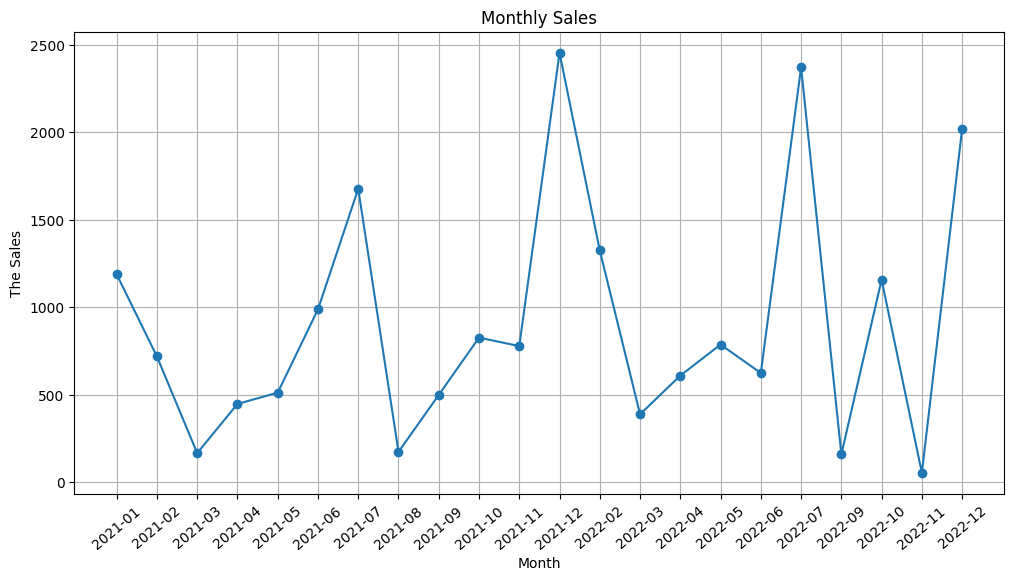

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total,Year,Month,Day
14,2021-09-01,Central,Smith,Desk,2,125.00,250.00,2021,9,1
15,2021-09-01,Central,Smith,Desk,2,125.00,250.00,2021,9,1
21,2021-12-29,East,Parent,Pen Set,74,15.99,1183.26,2021,12,29
22,2021-12-29,East,Parent,Pen Set,74,15.99,1183.26,2021,12,29
33,2022-07-21,Central,Morgan,Pen Set,55,12.49,686.95,2022,7,21
34,2022-07-21,Central,Morgan,Pen Set,55,12.49,686.95,2022,7,21
35,2022-07-21,Central,Morgan,Pen Set,55,12.49,686.95,2022,7,21


In [23]:
#interpret your data, appropriate title, appropriate chart
#display the dataframe of these items with the same date of sell, per region, according to its representative

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Total'].sum()
monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('The Sales')
plt.grid(True)
plt.xticks(rotation=40)
plt.show()

duplicate_sales = df.groupby(['OrderDate', 'Region', 'Rep','Total']).filter(lambda x: len(x)>1)
display(duplicate_sales)

# DESCRIPTIVE ANALYSIS
---
Looking at the graph, sales went up and down each month, with the highest sales happening in July and December of both years. The table shows some sales that were recorded more than once on the same day for the same person and place, which might be mistakes. The monthly sales data shows that sales rise and fall sharply over time, with the highest peaks in December 2021 and July 2022, while the lowest sales occurred in November 2022. The table also reveals duplicate sales entries, such as repeated transactions by Smith in September 2021, Parent in December 2021, and Morgan in July 2022. These duplicates may have inflated the sales figures during certain months. Overall, the sales trend is inconsistent, and the presence of duplicate records highlights the need to clean the data for a more accurate understanding of sales performance.
